**Baseline classifier model. Op basis van TF-IDF Logistische regressie. Moet class imbalance nog aanpakken.**

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import os

In [2]:
script_dir = os.getcwd() # Ga één map omhoog om 'baseline' te verwijderen en ga naar 'Data'
project_root = os.path.dirname(script_dir)  # Dit verwijdert 'baseline' van het script_dir
data_folder = os.path.join(project_root, "Data")

# 1. Dataset inladen
file_path = os.path.join(data_folder, "Grote_data.xlsx")
df = pd.read_excel(file_path)

# 2. Data verkennen
print("Dataset overzicht:")
print(df.info())
print(df.head())

Dataset overzicht:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26390 entries, 0 to 26389
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   context      26381 non-null  object
 1   question     26390 non-null  object
 2   statistical  26390 non-null  int64 
 3   theme        26390 non-null  object
 4   file_name    26390 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.0+ MB
None
                                             context  \
0  Ambtenaren Vlaamse overheid  -  HoofddoekWat h...   
1  Ambtenaren Vlaamse overheid  -  HoofddoekWat h...   
2  Ambtenaren Vlaamse overheid  -  HoofddoekWat h...   
3  Ambtenaren Vlaamse overheid  -  HoofddoekWat h...   
4  Ambtenaren Vlaamse overheid  -  HoofddoekWat h...   

                                            question  statistical  \
0  Kan de minister voor elke instelling (departem...            0   
1  a) Indien er geen richtlijnen bestaan, hoe wor...    

In [3]:
# 3. Missende waarden aanpakken
df = df.dropna(subset=["question"])  # Verwijder lege vragen
df["context"].fillna("", inplace=True)  # Vul missende context met lege string

# 4. Stopwoordenlijst (Nederlands, handmatig)
dutch_stopwords = {"de", "het", "een", "en", "van", "ik", "te", "dat", "die", "in", "je", "is", "niet", "op", "aan", "met", "als", "voor", "zijn", "was", "heeft", "heb", "om", "bij", "of", "geen", "dan", "toch", "maar", "wel", "meer", "doen", "ook", "kan", "mijn", "zo", "dus", "zou", "kunnen"}

def clean_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'\n', ' ', text)  # Nieuwe regels verwijderen
    text = re.sub(r'\b[a-z]\)\s+', ' ', text)  # Verwijder enumeraties zoals "a) b) c)" en voeg spatie toe
    text = re.sub(r'\b\d+\.\b', '', text)  # Verwijder numerieke opsommingen zoals "1. 2. 3."
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Speciale tekens verwijderen
    text = " ".join([word for word in text.split() if word not in dutch_stopwords])  # Stopwoorden verwijderen
    text = re.sub(r'\s+', ' ', text).strip()  # Dubbele spaties verwijderen
    return text

# 5. Data opschonen
df["clean_question"] = df["question"].apply(clean_text)

C:\Users\jefva\AppData\Local\Temp\ipykernel_37192\254478967.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["context"].fillna("", inplace=True)  # Vul missende context met lege string


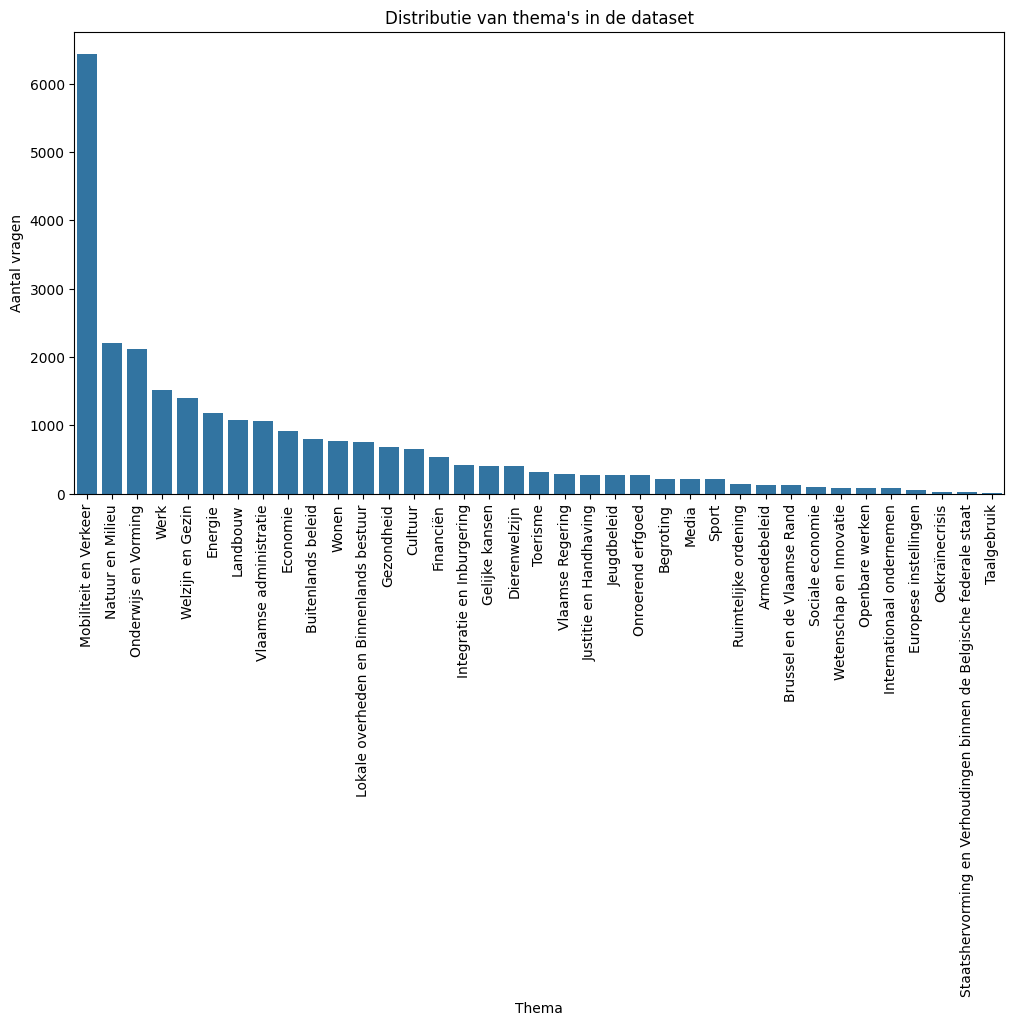

Top 10 thema's:
theme
Mobiliteit en Verkeer    6434
Natuur en Milieu         2203
Onderwijs en Vorming     2124
Werk                     1520
Welzijn en Gezin         1405
Energie                  1186
Landbouw                 1075
Vlaamse administratie    1069
Economie                  920
Buitenlands beleid        801
Name: count, dtype: int64


In [4]:
# 6. Distributie van thema's plotten
theme_counts = df["theme"].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=theme_counts.index, y=theme_counts.values)
plt.xticks(rotation=90)
plt.title("Distributie van thema's in de dataset")
plt.xlabel("Thema")
plt.ylabel("Aantal vragen")
plt.show()

print("Top 10 thema's:")
print(theme_counts.head(10))

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd

# ✅ Train TF-IDF + Logistic Regression Baseline Model
print("Training baseline model...")

# Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["clean_question"])
y = df["theme"]

# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Train Logistic Regression Model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# ✅ Predictions
y_pred = model.predict(X_test)

# ✅ Compute Accuracy, Precision, Recall, and F1-score (same format as BERT output)
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="weighted", zero_division=1)

# ✅ Format Output as DataFrame
baseline_results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1"],
    "Score": [accuracy, precision, recall, f1]
})

# ✅ Display results in a table format
print(baseline_results)


Training baseline model...
      Metric     Score
0   Accuracy  0.502653
1  Precision  0.597804
2     Recall  0.502653
3         F1  0.467584
